In [ ]:
import pandas as pd # biblioteka do działań na danych w postaci tabelarycznej
import matplotlib.pyplot as plt
import seaborn as sns # druga biblioteka do wykresów
import tensorflow as tf
import numpy as np

In [ ]:
data = pd.read_excel('Zawór sterujący 2001- 1 godzina.xls')
data

,Czas [s],P1[kPa],P2[kPa],T[C],F[m^3/h],CV[%],X[%],PV[%],deltaP[kPa],sqdP
0,0,665.689866,342.857143,96.715507,350.427350,35.506716,34.822955,48.840049,322.832723,17.967546
1,1,654.212454,344.078144,96.764347,350.915751,34.603175,34.700855,49.157509,310.134310,17.610631
2,2,652.258852,347.496947,96.764347,357.387057,35.018315,34.310134,49.206349,304.761905,17.457431
3,3,651.282051,349.938950,96.715507,358.974359,35.262515,34.261294,49.792430,301.343101,17.359237
4,4,654.212454,347.252747,96.764347,359.584860,36.092796,33.406593,49.987790,306.959707,17.520266
...,...,...,...,...,...,...,...,...,...,...
3596,3596,634.676435,356.532357,96.617827,368.742369,34.090354,32.918193,49.084249,278.144078,16.677652
3597,3597,640.781441,353.601954,96.593407,368.498168,33.455433,33.528694,48.888889,287.179487,16.946371
3598,3598,638.827839,355.311355,96.593407,367.155067,34.188034,33.382173,49.181929,283.516484,16.837948
3599,3599,637.851038,347.496947,96.593407,367.155067,33.919414,33.137973,49.035409,290.354091,17.039780


In [ ]:
data1 = data[data.index < 1800]
data1

,Czas [s],P1[kPa],P2[kPa],T[C],F[m^3/h],CV[%],X[%],PV[%],deltaP[kPa],sqdP
0,0,665.689866,342.857143,96.715507,350.427350,35.506716,34.822955,48.840049,322.832723,17.967546
1,1,654.212454,344.078144,96.764347,350.915751,34.603175,34.700855,49.157509,310.134310,17.610631
2,2,652.258852,347.496947,96.764347,357.387057,35.018315,34.310134,49.206349,304.761905,17.457431
3,3,651.282051,349.938950,96.715507,358.974359,35.262515,34.261294,49.792430,301.343101,17.359237
4,4,654.212454,347.252747,96.764347,359.584860,36.092796,33.406593,49.987790,306.959707,17.520266
...,...,...,...,...,...,...,...,...,...,...
1795,1795,638.339438,350.427350,96.642247,368.131868,33.089133,33.186813,49.377289,287.912088,16.967972
1796,1796,630.036630,356.776557,96.642247,371.916972,33.553114,32.625153,49.499389,273.260073,16.530580
1797,1797,628.815629,348.473748,96.666667,374.603175,33.406593,32.869353,49.230769,280.341881,16.743413
1798,1798,628.571429,356.043956,96.642247,374.847375,33.308913,32.625153,49.768010,272.527473,16.508406


In [ ]:
dP = data1['deltaP[kPa]'].to_numpy()
S21 = min(dP)
CE1 = (max(dP)+min(dP))/2
S11 = (CE1 + S21)/2
B21 = max(dP)
B11 = (B21 + CE1)/2

In [ ]:
X = data1['X[%]'].to_numpy()
S22 = min(X)
CE2 = (max(X)+min(X))/2
S12 = (CE2 + S22)/2
B22 = max(X)
B12 = (B22 + CE2)/2

In [ ]:
Y = data1['F[m^3/h]'].to_numpy()
S23 = min(Y)
CE3 = (max(Y)+min(Y))/2
S13 = (CE3 + S23)/2
B23 = max(Y)
B13 = (B23 + CE3)/2

In [ ]:
#listy punktow char. dla wykresow przynaleznosci
P1 = [S21 , S11 , CE1 , B11 , B21]
P1

[199.51159899999993,
 240.29303999999996,
 281.074481,
 321.85592199999996,
 362.637363]

In [ ]:
P2 = [S22 , S12 , CE2 , B12 , B22]
P2

[27.912088, 30.122100250000003, 32.3321125, 34.54212475, 36.752137]

In [ ]:
W1 = [S23 , S13 , CE3 , B13 , B23]
W1

[339.80464, 355.49450575000003, 371.1843715, 386.87423724999996, 402.564103]

In [ ]:
#boki rosnace strefy przynależności
def bokR(x1,x2,x):
  a = (0-1)/(x1-x2)
  b = 1 - a*x2
  return a*x + b
#boki malejace strefy przynależności
def bokM(x1,x2,x):
  a = (1-0)/(x1-x2)
  b = 0 - a*x2
  return a*x + b

In [ ]:
def szukaj_punktow(dane ,bokR,bokM, granice):
  wagi = [3]*1800
  rejony = [3]*1800

  for j in range(len(dane)):
    i = 0
    while i < 4:
      bR = bokR(granice[i],granice[i+1],dane[j])
      bM = bokM(granice[i],granice[i+1],dane[j])
      if (bR >= 0 and bR) <= 1 or (bM >= 0 and bM <= 1):
        if bM > bR and bM <=1 and bM >= 0:
          wagi[j] = bM
          if i == 0:
            rejony[j] = "S2"
          if i == 1:
            rejony[j] = "S1"
          if i == 2:
            rejony[j] = "CE"
          if i == 3:
            rejony[j] = "B1"
            
        elif bR > bM and bR <=1 and bR >= 0:
          wagi[j] = bR
          if i == 0:
            rejony[j] = "S1"
          if i == 1:
            rejony[j] = "CE"
          if i == 2:
            rejony[j] = "B1"
          if i == 3:
            rejony[j] = "B2"
      i += 1
  return wagi , rejony


In [ ]:
punktydP ,rejonydP = szukaj_punktow(dP,bokR,bokM,P1)
print(punktydP)
print(rejonydP)

[0.9760479037511178, 0.7125748450134468, 0.5808383279050906, 0.502994021226467, 0.6347305383348276, 0.9700598858191416, 0.9341317537063007, 0.7904191516920633, 0.9820359216830994, 0.7485029771262877, 0.5508982137242295, 0.5808383279050888, 0.5389221533393087, 0.6826347308325849, 0.694610766696548, 0.5269461174753509, 0.7964071941450053, 0.5988024062219877, 0.9760479037511214, 0.8742515008236245, 0.9341317291853395, 0.7604790620321609, 0.9999999999999991, 0.9221556933213808, 0.7604790375112067, 0.6646706525156878, 0.5868263458370686, 0.56287424958819, 0.9281437112533615, 0.7544910195792252, 0.8682634828916402, 0.9401197716382779, 0.9161676508684442, 0.6047904241539648, 0.808383230008964, 0.8862275612085391, 0.6886227487645691, 0.7664670554431847, 0.8323353262578408, 0.6766467129006042, 0.6167664600179279, 0.8862275612085391, 0.8323353262578443, 0.7844311337600862, 0.7185628874663834, 0.5868263458370677, 0.5269461174753474, 0.7784431158281038, 0.892215579140518, 0.6047904241539683, 0.616

In [ ]:
punktyX , rejonyX = szukaj_punktow(X,bokR,bokM,P2)
print(punktyX)
print(rejonyX)

[0.8729281930450821, 0.9281767555813332, 0.8950273918164928, 0.8729279668019956, 0.5138124234379227, 0.740331642958088, 0.5303866528341601, 0.8618784805378326, 0.6850828541787504, 0.9281767555813332, 0.8397790555233335, 0.6740331416715009, 0.5359118484524217, 0.7513811292222492, 0.9392262418454944, 0.5359118484524217, 0.61325983600317, 0.5966851541207525, 0.6740331416715009, 0.8839779055523316, 0.9834255443606725, 0.8729279668019956, 0.5303866528341601, 0.8839779055523316, 0.7845304929870842, 0.9723756056103294, 0.6298342916425028, 0.8839776793092433, 0.817679404265748, 0.5966853803638408, 0.7845304929870842, 0.850828768030583, 0.9502759543527439, 0.6961327929290864, 0.5414363653414114, 0.7292819304508384, 0.740331642958088, 0.9834255443606725, 0.7734807804798347, 0.6077350928710885, 0.6077350928710885, 0.6298345178855911, 0.7292819304508384, 0.9723756056103294, 0.7734807804798347, 0.602209897252834, 0.624309322267333, 0.6850830804218369, 0.6408842303928406, 0.563535790355914, 0.646408

In [ ]:
punktyY , rejonyY = szukaj_punktow(Y,bokR,bokM,W1)
print(punktyY)
print(rejonyY)

[0.6770427592728083, 0.7081711964297703, 0.8793774733222293, 0.7782101322313757, 0.7392996017190292, 0.9105058467437814, 0.8715952843637247, 0.8093385375206275, 0.770428007008281, 0.8093385375206275, 0.9649805639669076, 0.8638132228760504, 0.7470817588098235, 0.708171228297477, 0.700389134942089, 0.708171228297477, 0.7159533216528651, 0.7782101322313757, 0.8015564122975363, 0.9105058467437814, 0.9649805320991973, 0.8715952843637247, 0.8171206308760155, 0.7859921937190535, 0.8015563804298296, 0.9105058148760747, 0.9338521268099456, 0.8015564122975363, 0.7859922255867637, 0.9961089373884562, 0.9416342520330332, 0.9649805320991973, 0.9883268121653579, 0.9027237215206867, 0.7237353831405429, 0.6770427592728083, 0.7548638202975013, 0.9883268440330681, 0.9649805639669076, 0.8249027242314, 0.7315174764959345, 0.6848249163636027, 0.7626459136528894, 0.9105058148760747, 0.9416342520330332, 0.7159532897851548, 0.5291828580496265, 0.5953307631073947, 0.50972767246272, 0.5758754819173646, 0.552529

In [ ]:
def redukuj1(region1,region2,region3, waga1,waga2,waga3):
  rej1 = ['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']
  rej2 = ['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']
  rej3 = ['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']
  num1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  maks = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

  reg1 = ["B1","B2","CE","S1","S2"]

  for j in range(len(waga1)):
    naj = 0
    if region1[j] == "B1" and region2[j] == "B1":
      if waga1[j]*waga2[j]*waga3[j] > maks[0]:
        maks[0] = waga1[j]*waga2[j]*waga3[j]
        rej1[0] = region1[j]
        rej2[0] = region2[j]
        rej3[0] = region3[j]
        num1[0] = j
        
    elif region1[j] == "B1" and region2[j] == "B2":
      if waga1[j]*waga2[j]*waga3[j] > maks[1]:
        maks[1] = waga1[j]*waga2[j]*waga3[j]
        rej1[1] = region1[j]
        rej2[1] = region2[j]
        rej3[1] = region3[j]
        num1[1] = j

    elif region1[j] == "B1" and region2[j] == "CE":
      if waga1[j]*waga2[j]*waga3[j] > maks[2]:
        maks[2] = waga1[j]*waga2[j]*waga3[j]
        rej1[2] = region1[j]
        rej2[2] = region2[j]
        rej3[2] = region3[j]
        num1[2] = j
    elif region1[j] == "B1" and region2[j] == "S1":
      if waga1[j]*waga2[j]*waga3[j] > maks[3]:
        maks[3] = waga1[j]*waga2[j]*waga3[j]
        rej1[3] = region1[j]
        rej2[3] = region2[j]
        rej3[3] = region3[j]
        num1[3] = j

    elif region1[j] == "B1" and region2[j] == "S2":
      if waga1[j]*waga2[j]*waga3[j] > maks[4]:
        maks[4] = waga1[j]*waga2[j]*waga3[j]
        rej1[4] = region1[j]
        rej2[4] = region2[j]
        rej3[4] = region3[j]
        num1[4] = j

    elif region1[j] == "B2" and region2[j] == "B1":
      if waga1[j]*waga2[j]*waga3[j] > maks[5]:
        maks[5] = waga1[j]*waga2[j]*waga3[j]
        rej1[5] = region1[j]
        rej2[5] = region2[j]
        rej3[5] = region3[j]
        num1[5] = j
    elif region1[j] == "B2" and region2[j] == "B2":
      if waga1[j]*waga2[j]*waga3[j] > maks[6]:
        maks[6] = waga1[j]*waga2[j]*waga3[j]
        rej1[6] = region1[j]
        rej2[6] = region2[j]
        rej3[6] = region3[j]
        num1[6] = j
    elif region1[j] == "B2" and region2[j] == "CE":
      if waga1[j]*waga2[j]*waga3[j] > maks[7]:
        maks[7] = waga1[j]*waga2[j]*waga3[j]
        rej1[7] = region1[j]
        rej2[7] = region2[j]
        rej3[7] = region3[j]
        num1[7] = j
    elif region1[j] == "B2" and region2[j] == "S1":
      if waga1[j]*waga2[j]*waga3[j] > maks[8]:
        maks[8] = waga1[j]*waga2[j]*waga3[j]
        rej1[8] = region1[j]
        rej2[8] = region2[j]
        rej3[8] = region3[j]
        num1[8] = j
    elif region1[j] == "B2" and region2[j] == "S2":
      if waga1[j]*waga2[j]*waga3[j] > maks[9]:
        maks[9] = waga1[j]*waga2[j]*waga3[j]
        rej1[9] = region1[j]
        rej2[9] = region2[j]
        rej3[9] = region3[j]
        num1[9] = j
    elif region1[j] == "CE" and region2[j] == "B1":
      if waga1[j]*waga2[j]*waga3[j] > maks[10]:
        maks[10] = waga1[j]*waga2[j]*waga3[j]
        rej1[10] = region1[j]
        rej2[10] = region2[j]
        rej3[10] = region3[j]
        num1[10] = j
    elif region1[j] == "CE" and region2[j] == "B2":
      if waga1[j]*waga2[j]*waga3[j] > maks[11]:
        maks[11] = waga1[j]*waga2[j]*waga3[j]
        rej1[11] = region1[j]
        rej2[11] = region2[j]
        rej3[11] = region3[j]
        num1[11] = j
    elif region1[j] == "CE" and region2[j] == "CE":
      if waga1[j]*waga2[j]*waga3[j] > maks[12]:
        maks[12] = waga1[j]*waga2[j]*waga3[j]
        rej1[12] = region1[j]
        rej2[12] = region2[j]
        rej3[12] = region3[j]
        num1[12] = j
    elif region1[j] == "CE" and region2[j] == "S1":
      if waga1[j]*waga2[j]*waga3[j] > maks[13]:
        maks[13] = waga1[j]*waga2[j]*waga3[j]
        rej1[13] = region1[j]
        rej2[13] = region2[j]
        rej3[13] = region3[j]
        num1[13] = j
    elif region1[j] == "CE" and region2[j] == "S2":
      if waga1[j]*waga2[j]*waga3[j] > maks[14]:
        maks[14] = waga1[j]*waga2[j]*waga3[j]
        rej1[14] = region1[j]
        rej2[14] = region2[j]
        rej3[14] = region3[j]
        num1[14] = j
    elif region1[j] == "S1" and region2[j] == "B1":
      if waga1[j]*waga2[j]*waga3[j] > maks[15]:
        maks[15] = waga1[j]*waga2[j]*waga3[j]
        rej1[15] = region1[j]
        rej2[15] = region2[j]
        rej3[15] = region3[j]
        num1[15] = j
    elif region1[j] == "S1" and region2[j] == "B2":
      if waga1[j]*waga2[j]*waga3[j] > maks[16]:
        maks[16] = waga1[j]*waga2[j]*waga3[j]
        rej1[16] = region1[j]
        rej2[16] = region2[j]
        rej3[16] = region3[j]
        num1[16] = j
    elif region1[j] == "S1" and region2[j] == "CE":
      if waga1[j]*waga2[j]*waga3[j] > maks[17]:
        maks[17] = waga1[j]*waga2[j]*waga3[j]
        rej1[17] = region1[j]
        rej2[17] = region2[j]
        rej3[17] = region3[j]
        num1[17] = j
    elif region1[j] == "S1" and region2[j] == "S1":
      if waga1[j]*waga2[j]*waga3[j] > maks[18]:
        maks[18] = waga1[j]*waga2[j]*waga3[j]
        rej1[18] = region1[j]
        rej2[18] = region2[j]
        rej3[18] = region3[j]
        num1[18] = j
    elif region1[j] == "S1" and region2[j] == "S2":
      if waga1[j]*waga2[j]*waga3[j] > maks[19]:
        maks[19] = waga1[j]*waga2[j]*waga3[j]
        rej1[19] = region1[j]
        rej2[19] = region2[j]
        rej3[19] = region3[j]
        num1[19] = j
    elif region1[j] == "S2" and region2[j] == "B1":
      if waga1[j]*waga2[j]*waga3[j] > maks[20]:
        maks[20] = waga1[j]*waga2[j]*waga3[j]
        rej1[20] = region1[j]
        rej2[20] = region2[j]
        rej3[20] = region3[j]
        num1[20] = j
    elif region1[j] == "S2" and region2[j] == "B2":
      if waga1[j]*waga2[j]*waga3[j] > maks[21]:
        maks[21] = waga1[j]*waga2[j]*waga3[j]
        rej1[21] = region1[j]
        rej2[21] = region2[j]
        rej3[21] = region3[j]
        num1[21] = j
    elif region1[j] == "S2" and region2[j] == "CE":
      if waga1[j]*waga2[j]*waga3[j] > maks[22]:
        maks[22] = waga1[j]*waga2[j]*waga3[j]
        rej1[22] = region1[j]
        rej2[22] = region2[j]
        rej3[22] = region3[j]
        num1[22] = j
    elif region1[j] == "S2" and region2[j] == "S1":
      if waga1[j]*waga2[j]*waga3[j] > maks[23]:
        maks[23] = waga1[j]*waga2[j]*waga3[j]
        rej1[23] = region1[j]
        rej2[23] = region2[j]
        rej3[23] = region3[j]
        num1[23] = j
    elif region1[j] == "S2" and region2[j] == "S2":
      if waga1[j]*waga2[j]*waga3[j] > maks[24]:
        maks[24] = waga1[j]*waga2[j]*waga3[j]
        rej1[24] = region1[j]
        rej2[24] = region2[j]
        rej3[24] = region3[j]
        num1[24] = j

  return maks , rej1 , rej2 , rej3, num1

In [ ]:
def redukuj1(region1,region2,region3, waga1,waga2,waga3):
  rej1 = ['0']*25
  rej2 = ['0']*25
  rej3 = ['0']*25
  num1 = [0]*25
  maks = [0]*25
  reg1 = ["B1","B2","CE","S1","S2"]

  kombinacje = []
  for iterator in reg1:
	  for iterator1 in reg1:
  		kombinacje.append((iterator,iterator1))

  for j in range(len(waga1)):
    naj = 0
    for p in reg1:
      for s in reg1:
        if region1[j] == p and region2[j] == s:
          kom = kombinacje.index((p,s))
          if waga1[j]*waga2[j]*waga3[j] > maks[kom]:
            maks[kom] = waga1[j]*waga2[j]*waga3[j]
            rej1[kom] = region1[j]
            rej2[kom] = region2[j]
            rej3[kom] = region3[j]
            num1[kom] = j

  return maks , rej1 , rej2 , rej3, num1

In [ ]:
maksy , rej1 , rej2 , rej3 , numer = redukuj1(rejonydP,rejonyX,rejonyY, punktydP,punktyX,punktyY)

In [ ]:
#tabela 25 reguł
print(maksy)
print(rej1)
print(rej2)
print(rej3)
print(numer)
print(len(maksy))

[0.8864784049612277, 0.47984298880776927, 0.44021709144141163, 0, 0, 0.26322230738202546, 0.8247092960913165, 0, 0, 0, 0.5431661295399598, 0, 0.8496408225057573, 0.3232043067111655, 0, 0, 0, 0.5220466808307205, 0.7582700841220327, 0.35541695427445136, 0, 0, 0, 0.23500614672771974, 0.8599221283967964]
['B1', 'B1', 'B1', '0', '0', 'B2', 'B2', '0', '0', '0', 'CE', '0', 'CE', 'CE', '0', '0', '0', 'S1', 'S1', 'S1', '0', '0', '0', 'S2', 'S2']
['B1', 'B2', 'CE', '0', '0', 'B1', 'B2', '0', '0', '0', 'B1', '0', 'CE', 'S1', '0', '0', '0', 'CE', 'S1', 'S2', '0', '0', '0', 'S1', 'S2']
['S1', 'S1', 'CE', '0', '0', 'S1', 'S2', '0', '0', '0', 'S1', '0', 'CE', 'B1', '0', '0', '0', 'B1', 'B1', 'B2', '0', '0', '0', 'B1', 'B2']
[20, 1129, 589, 0, 0, 332, 111, 0, 0, 0, 297, 0, 1682, 932, 0, 0, 0, 866, 928, 916, 0, 0, 0, 923, 914]
25


In [ ]:
df = pd.DataFrame((list(zip(maksy, rej1,rej2,rej3))), columns = ['Wartość', 'deltaP','X','F'])
df

,Wartość,deltaP,X,F
0,0.886478,B1,B1,S1
1,0.479843,B1,B2,S1
2,0.440217,B1,CE,CE
3,0.000000,0,0,0
4,0.000000,0,0,0
5,0.263222,B2,B1,S1
6,0.824709,B2,B2,S2
7,0.000000,0,0,0
8,0.000000,0,0,0
9,0.000000,0,0,0


In [ ]:
pomo = [10]*25
for k in range(len(rej3)):
  if rej3[k] == 'S2':
    pomo[k] = 0
  elif rej3[k] == 'S1':
    pomo[k] = 1
  elif rej3[k] == 'CE':
    pomo[k] = 2
  elif rej3[k] == 'B1':
    pomo[k] = 3
  elif rej3[k] == 'B2':
    pomo[k] = 4

print(pomo)
print(len(pomo))

[1, 1, 2, 10, 10, 1, 0, 10, 10, 10, 1, 10, 2, 3, 10, 10, 10, 3, 3, 4, 10, 10, 10, 3, 4]
25


In [ ]:
#szukanie mniejszych wartosci
def szukaj_mniejszych(dane ,bokR,bokM, granice):
  wagi = [3]*1800
  rejony = [3]*1800
  
  for j in range(len(dane)):
    i = 0
    while i < 4:
      bR = bokR(granice[i],granice[i+1],dane[j])
      bM = bokM(granice[i],granice[i+1],dane[j])
      if bR >= 0 and bR <= 1 or bM >= 0 and bM <= 1:
        if bM > bR and bR <=1 and bR >= 0:
          wagi[j] = bR
          if i == 0:
            rejony[j] = "S1"
          if i == 1:
            rejony[j] = "CE"
          if i == 2:
            rejony[j] = "B1"
          if i == 3:
            rejony[j] = "B2"
            
        elif bR >bM and bM <=1 and bM >= 0:
          wagi[j] = bM
          if i == 0:
            rejony[j] = "S2"
          if i == 1:
            rejony[j] = "S1"
          if i == 2:
            rejony[j] = "CE"
          if i == 3:
            rejony[j] = "B1"
      i += 1
  return wagi , rejony


In [ ]:
wagiSdP , rejSdP = szukaj_mniejszych(dP,bokR,bokM,P1)
wagiSX , rejSX = szukaj_mniejszych(X,bokR,bokM,P2)
print(wagiSdP)
print(rejSdP)
print(wagiSX)
print(rejSX)

print(punktydP)
print(rejonydP)
print(punktyX)
print(rejonyX)

[0.02395209624888217, 0.2874251549865532, 0.4191616720949094, 0.49700597877353303, 0.3652694616651724, 0.0299401141808584, 0.06586824629369925, 0.20958084830793666, 0.01796407831690061, 0.25149702287371234, 0.44910178627577046, 0.4191616720949112, 0.4610778466606913, 0.31736526916741514, 0.305389233303452, 0.4730538825246491, 0.20359280585499473, 0.40119759377801234, 0.023952096248878618, 0.12574849917637554, 0.06586827081466051, 0.23952093796783913, 8.881784197001252e-16, 0.07784430667861919, 0.2395209624887933, 0.3353293474843122, 0.4131736541629314, 0.43712575041181, 0.07185628874663852, 0.24550898042077485, 0.13173651710835976, 0.05988022836172213, 0.0838323491315558, 0.3952095758460352, 0.19161676999103605, 0.11377243879146093, 0.3113772512354309, 0.23353294455681528, 0.1676646737421592, 0.3233532870993958, 0.3832335399820721, 0.11377243879146093, 0.16766467374215566, 0.21556886623991378, 0.2814371125336166, 0.4131736541629323, 0.47305388252465264, 0.22155688417189623, 0.107784420

In [ ]:
#defuzyfikacja
def defuzz(rejM1,rejM2,rejM3,pomo,Xl1,rejXl1,Xl2,rejXl2,Xs1,rejXs1,Xs2,rejXs2,W):
  s = 0
  ys = 0
  defuz = [0]*1800
  YS = [0]*1800

  for i in range (1800):
    s = 0
    ys = 0
    for p in range(25):
      if (rejXl1[i] == rejM1[p]) and (rejXl2[i] == rejM2[p]) and (rejM3[p] != 0):
        s += Xl1[i] * Xl2[i] * W[pomo[p]]
        ys += Xl1[i]*Xl2[i]

      elif (rejXs1[i] == rejM1[p]) and (rejXs2[i] == rejM2[p]) and (rejM3[p] != 0):
        s += Xs1[i] * Xs2[i] * W[pomo[p]]
        ys += Xs1[i]*Xs2[i]
      
      elif (rejXs1[i] == rejM1[p]) and (rejXl2[i] == rejM2[p]) and (rejM3[p] != 0):
        s += Xs1[i] * Xl2[i] * W[pomo[p]]
        ys += Xs1[i]*Xl2[i]
      
      elif (rejXl1[i] == rejM1[p]) and (rejXs2[i] == rejM2[p]) and (rejM3[p] != 0):
        s += Xl1[i] * Xs2[i] * W[pomo[p]]
        ys += Xl1[i]*Xs2[i]


    if ys != 0:
      defuz[i] = float(s/ys)
    else:
      defuz[i] = 0
    YS[i] = s


  return defuz , YS

In [ ]:
d, ys = defuzz(rej1,rej2,rej3,pomo,punktydP,rejonydP,punktyX,rejonyX,wagiSdP,rejSdP,wagiSX,rejSX,W1)
print(d)
print(ys)

[355.44675150740363, 355.49450575000003, 357.14151187982657, 357.48824889145624, 363.5561536944232, 355.49450575000003, 355.49450575000003, 355.04032139654106, 360.3743591286333, 355.49450575000003, 355.49450575000003, 360.6088819961234, 363.90289070605286, 359.39530245541954, 356.4480378565672, 363.90289070605286, 365.11647024675676, 361.82246153682735, 360.60888199612344, 355.49450575, 355.73769312035586, 357.05830201238234, 355.49450575, 355.352800224919, 355.4945057500001, 355.49450575000003, 361.30235601938284, 357.31488038564146, 358.35509142053047, 353.9409366481174, 355.0491457351055, 355.3543574765154, 356.27466935075233, 353.6102904732337, 354.11586105578345, 355.0112538840231, 355.49450575, 355.7545567338604, 354.8986160861439, 353.50440086975937, 353.1358628395422, 354.8337328645775, 355.49450575000003, 355.49450575000003, 354.49426245103166, 351.59059628436563, 350.86078712172224, 354.39979225685374, 354.8871967788754, 352.78808494368633, 349.2392193194376, 351.60513084728

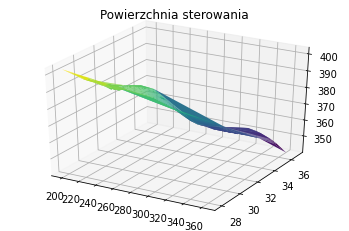

In [ ]:
#powierzchnia sterowania F !
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x1 = dP
x2 = X
y = d

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x1,x2,y,linewidth=0.2, antialiased=True, cmap='viridis')
ax.set_title('Powierzchnia sterowania')
plt.show()

WALIDACJA DANYCH NA KOLEJNYCH 1800 REKORDOW !

In [ ]:
data2 = data[data.index > 1800]
data2

,Czas [s],P1[kPa],P2[kPa],T[C],F[m^3/h],CV[%],X[%],PV[%],deltaP[kPa],sqdP
1801,1801,647.374847,342.124542,96.666667,369.597070,35.238095,33.797314,50.354090,305.250305,17.471414
1802,1802,648.595849,346.275946,96.617827,365.323565,34.798535,34.407814,49.987790,302.319903,17.387349
1803,1803,649.816850,342.124542,96.593407,363.247863,33.894994,34.456654,49.035409,307.692308,17.541160
1804,1804,640.293040,347.008547,96.642247,362.271062,32.796093,33.699634,48.962149,293.284493,17.125551
1805,1805,634.920635,350.915751,96.642247,366.666667,32.942613,33.137973,48.620269,284.004884,16.852444
...,...,...,...,...,...,...,...,...,...,...
3596,3596,634.676435,356.532357,96.617827,368.742369,34.090354,32.918193,49.084249,278.144078,16.677652
3597,3597,640.781441,353.601954,96.593407,368.498168,33.455433,33.528694,48.888889,287.179487,16.946371
3598,3598,638.827839,355.311355,96.593407,367.155067,34.188034,33.382173,49.181929,283.516484,16.837948
3599,3599,637.851038,347.496947,96.593407,367.155067,33.919414,33.137973,49.035409,290.354091,17.039780


In [ ]:
waldP = data2['deltaP[kPa]'].to_numpy()
wS21 = min(waldP)
wCE1 = (max(waldP)+min(waldP))/2
wS11 = (wCE1 + wS21)/2
wB21 = max(waldP)
wB11 = (wB21 + wCE1)/2

In [ ]:
walX = data2['X[%]'].to_numpy()
wS22 = min(walX)
wCE2 = (max(walX)+min(walX))/2
wS12 = (wCE2 + wS22)/2
wB22 = max(walX)
wB12 = (wB22 + wCE2)/2

In [ ]:
walY = data2['F[m^3/h]'].to_numpy()
wS23 = min(walY)
wCE3 = (max(walY)+min(walY))/2
wS13 = (wCE3 + wS23)/2
wB23 = max(walY)
wB13 = (wB23 + wCE3)/2

In [ ]:
P11 = [wS21 , wS11 , wCE1 , wB11 , wB21]
P22 = [wS22 , wS12 , wCE2 , wB12 , wB22]
W11 = [wS23 , wS13 , wCE3 , wB13 , wB23]
W11

[341.514042, 352.716728, 363.919414, 375.12210000000005, 386.324786]

In [ ]:
X1 ,R1 = szukaj_punktow(waldP,bokR,bokM,P11)
X2 , R2 = szukaj_punktow(walX,bokR,bokM,P22)
Y3 , R3 = szukaj_punktow(walY,bokR,bokM,W11)

X1s , R1s = szukaj_mniejszych(waldP,bokR,bokM,P11)
X2s , R2s = szukaj_mniejszych(walX,bokR,bokM,P22)

In [ ]:
wal, ys1 = defuzz(rej1,rej2,rej3,pomo,X1,R1,X2,R2,X1s,R1s,X2s,R2s,W11)
print(wal)

[359.85430078395575, 355.12743395438764, 354.74928460802215, 360.61059947668673, 365.51795502885017, 371.63390721636074, 375.023265173499, 374.4484456768795, 374.59115003667165, 368.49238459062207, 369.5980534068971, 366.06469622564765, 365.7294144637709, 368.48359131410376, 371.4116565716059, 366.98455106366805, 359.8543007839558, 360.0433754571385, 361.55597284260034, 363.0685779706778, 367.10770246525726, 374.3009435912761, 374.8178009921082, 374.8401860828663, 368.7138383295073, 365.14041326795854, 364.76832200284224, 361.55597284260034, 370.4387005317137, 368.1665998339377, 371.0506909891499, 370.5618136987061, 371.0430952338028, 375.0612396287747, 375.6277981602866, 367.8845767565538, 368.0176130474716, 364.618459410088, 364.9266511766007, 370.4746718630109, 374.07229432439595, 377.0897791972488, 376.10421916807746, 371.9784805929701, 364.347889364622, 366.3609958488265, 372.9194576832016, 373.1141286462615, 369.0656050291847, 367.90702734519346, 363.44672731704316, 363.635801990

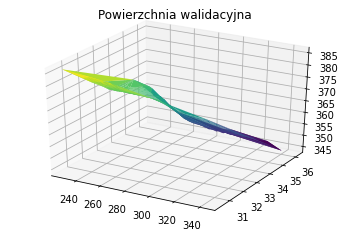

In [ ]:
#powierzchnia przy walidacji
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x1 = waldP
x2 = walX
y = wal

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

ax1.plot_trisurf(x1,x2,y,linewidth=0.2, antialiased=True, cmap='viridis')
ax1.set_title('Powierzchnia walidacyjna')
plt.show()

In [ ]:
#błąd bezwzględny i względny dla walidacyjnych 
import cmath
bladB = [0]*1800
bladW = [0]*1800
s = 0
for k in range(1800):
  s = wal[k] - walY[k]
  if wal[k] == 0 or walY[k] == 0:
    s = bladB[k-1]
  bladB[k] = s
  bladW[k] = s*100/max(wal)

print(bladB)
print(bladW)
print()

[-9.742769216044223, -10.196131045612333, -8.498578391977844, -1.6604625233132424, -1.1487119711498508, -1.2598657836392704, -2.266111826501003, -5.160834323120525, -5.140229963328352, -10.140094409377923, -6.2261225931029, -8.05007777435236, -7.408558536229066, -4.288081685896259, -2.336817428394113, -7.008122936331972, -9.864869216044212, -8.33269254286148, -5.843294157399669, -3.9643890293222057, -1.3904655347427592, 1.6513705912761338, -2.1052760078918027, -4.158592917133717, -10.7733406704927, -10.439562732041452, -6.416048997157759, -8.285297157399668, -0.379370468286254, -4.605073166062311, -2.3314820108500953, -4.651861301293934, -4.658980766197203, -2.71653837122534, -3.9814818397134104, -12.335203243446188, -10.004364952528363, -9.13001458991198, -6.013519823399292, 0.022901863010872603, -0.4087796756040234, -2.8858008027511914, -4.970261831922528, -8.607600407029906, -12.330987635377994, -7.509578151173457, -1.5616163167983927, -4.053148353738493, -8.223771970815278, -8.1613

In [ ]:
s = 0
for o in range(1800):
  s = s + bladW[o]
avg = s/1800
avg

-0.6388858903054825

In [ ]:
s = 0
for o in range(1800):
  s = s + bladB[o]
avg = s/1800
avg

-2.4681745485068523

In [ ]:
print(max(bladW))
print(min(bladW))
print(max(bladB))
print(min(bladB))

3.030920254179279
-3.8952435144452653
11.709196185788755
-15.048291171359551


In [ ]:
#odchylenie standardowe
SD = np.std(wal)
SD

7.001505185779362

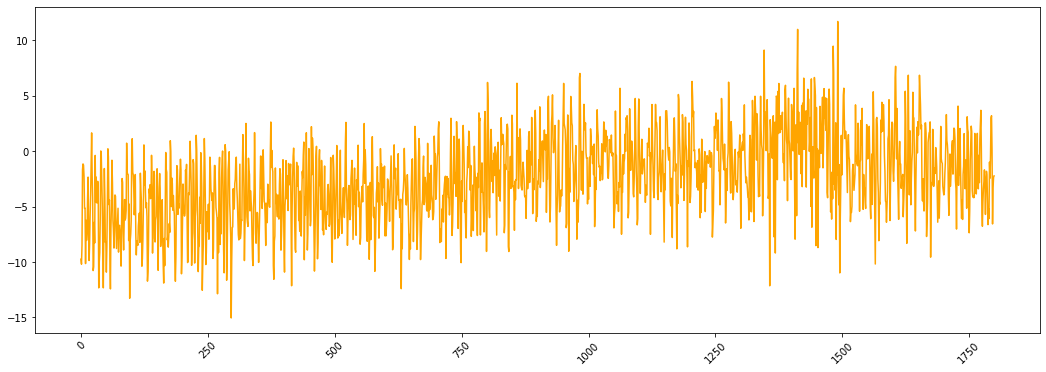

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(bladB, 'orange')
plt.xticks(rotation=45);

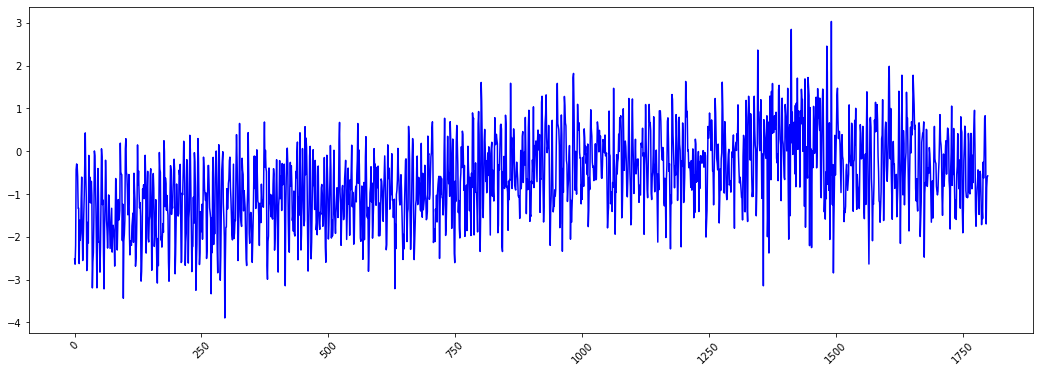

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(bladW, 'blue')
plt.xticks(rotation=45);

In [ ]:
avg = 0
for k in range(1800):
  avg += wal[k]
avg = avg/1800
for p in range(1800):
  if wal[p] == 0:
    wal[p] = avg

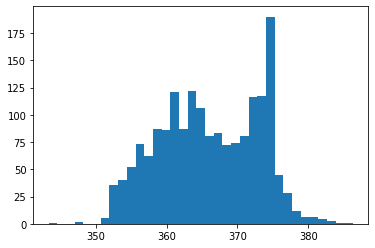

In [ ]:
plt.hist(wal, 35)
plt.show()